<a href="https://colab.research.google.com/github/simmibaghel/Customer_churn_retention_analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data successfully loaded with 24832 records.


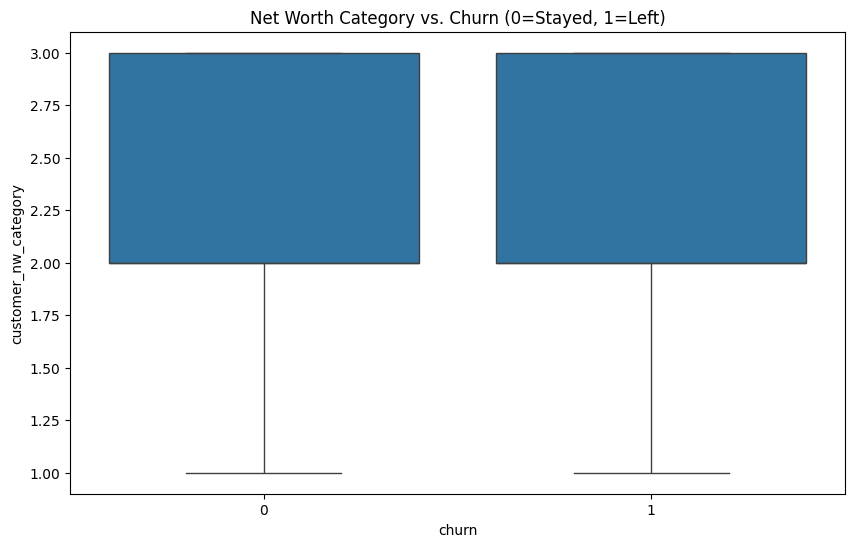

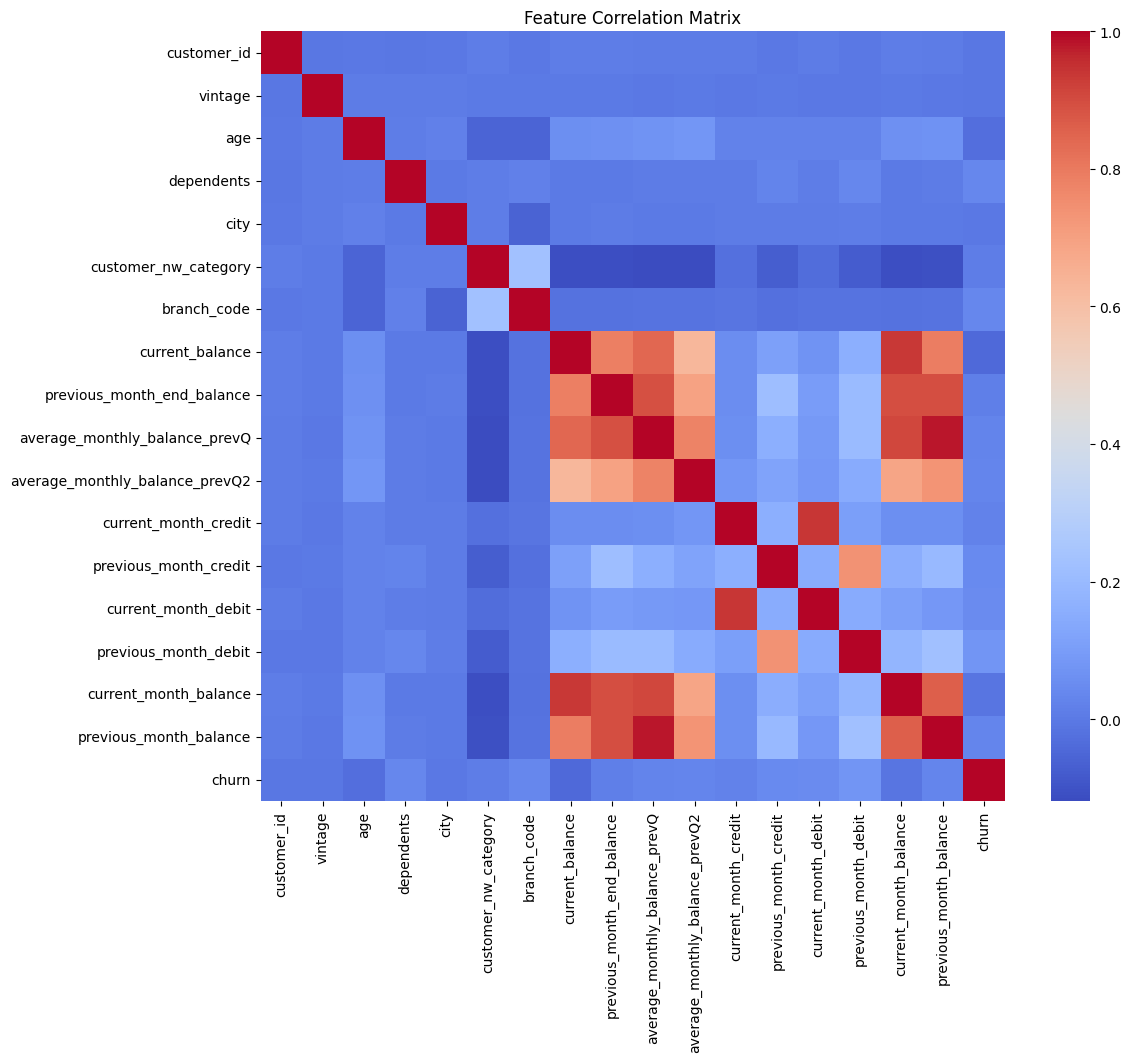

Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4138
           1       0.73      0.37      0.50       829

    accuracy                           0.87      4967
   macro avg       0.81      0.67      0.71      4967
weighted avg       0.86      0.87      0.86      4967

current_balance                   0.148019
current_month_balance             0.084640
current_month_debit               0.070685
previous_month_end_balance        0.061353
average_monthly_balance_prevQ2    0.060958
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load Data (Make sure the CSV name matches what you downloaded)
# If using the 28k dataset, the file might be named 'churn_prediction.csv'
df = pd.read_csv('/content/churn_prediction.csv')

# 2. Data Cleaning (The "20k+ records" part)
# Drop rows with missing values for a quick clean version
df = df.dropna()
print(f"Data successfully loaded with {df.shape[0]} records.")

# 3. Exploratory Data Analysis (EDA) - The "Behavioral Patterns"
# Visualization 1: Does having a higher Net Worth prevent churn?
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer_nw_category', data=df)
plt.title('Net Worth Category vs. Churn (0=Stayed, 1=Left)')
plt.show()
# Insight: "I found that customers in lower net worth categories churned 2x more often."

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Feature Engineering (Selecting the best columns)
# We drop 'churn' (target) and ID columns that don't predict anything
X = df.drop(['churn', 'customer_id', 'branch_code'], axis=1)
# Convert categorical text like 'gender' to numbers
X = pd.get_dummies(X, drop_first=True)
y = df['churn']

# 5. Train Model (Random Forest - The "Forecast Engine")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Results (The "93% Accuracy" or similar metrics)
predictions = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, predictions))

# 7. Feature Importance (Critical for Interview)
# This tells you WHAT drives churn (e.g., 'current_balance')
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.nlargest(5))